### feature 전처리 ver2
* 행정동 별 입지특성 vs 매장 반경 500m 입지특성
* 인구 특성은 동일함 (유동인구비율 = 활동인구/거주인구)

### clustering ver2
* 입지특성으로 cluster 1차 진행 후 인구 특성으로 2차 cluster 진행

In [1]:
# import module
import pandas as pd

## Load Data
# 깐부치킨 매장별 행정동 데이터 Load
store_dong = pd.read_csv("../resources/processedData/깐부치킨_매장좌표_행정동 추가.csv", encoding="utf8")

# 깐부치킨 거래데이터 Load
sales = pd.read_csv("../resources/processedData/깐부치킨_거래데이터.csv", encoding="utf8")

# 행정동별 면적 데이터 Load
dong_area = pd.read_csv("../resources/processedData/강남구_행정동별_면적.csv", encoding="utf8")

# 행정동별 인구 feature Load
people = pd.read_csv("../resources/processedData/강남구 행정동별 인구 feature.csv", encoding="utf8")

# 행정동별 토지 피복 비율 데이터 Load
dong_landscape = pd.read_csv("../resources/processedData/입지특성_행정동별 feature.csv", encoding="utf8")

# 행정동별 토지 면적 데이터
dong_landarea = pd.read_csv("../resources/processedData/입지특성_행정동별_토지피복_면적.csv", encoding="utf8")

# 매장별 반경 500m 토지 피복 비율 데이터 Load
store_landscape = pd.read_csv("../resources/processedData/입지특성_매장별_매장반경 500m feature.csv", encoding="utf8")

# 행정동별 토지 면적 데이터
store_landarea = pd.read_csv("../resources/processedData/입지특성_매장별_매장반경 500m 토지피복_면적.csv", encoding="utf8")

In [10]:
store_landarea

,매장코드,매장명,주거지역 면적,상업지역 면적,문화체육휴양시설 면적
0,T06644,(주)깐부 청담본점,388069.573100,269846.246200,13887.695540
1,T50791,(주)깐부치킨(세곡점),85272.945180,17855.172790,6267.204868
2,S49287,깐부치킨 대치역점,176161.728700,45248.342350,19933.910720
3,T79908,깐부치킨 신사가로수점,333419.080700,171338.369400,29099.713580
4,T53532,깐부치킨 역삼본점,1260.685696,293097.445400,443948.759300
5,S23991,깐부치킨(강남구청역1번출구점),368678.340900,145248.426300,11432.345920
6,T46063,깐부치킨(강남구청역3번출구점),342598.190300,182277.484400,16778.207570
7,S48814,깐부치킨(강남세브란스점),293574.604000,122254.414300,12518.041550
8,S37219,깐부치킨(강남역플래티넘점),10173.239100,250476.594700,7453.801107
9,S41446,깐부치킨(개포점),108435.066800,12692.260300,23387.247690


In [7]:
# 매장별 행정동 추출
store_dong
dong_list = list(store_dong["행정동"].unique())
dong = pd.DataFrame(dong_list, columns=["행정동"])

# 매장 이름 추출
store_list = list(store_dong["매장명"])
store_list

['깐부치킨(청담자이점)',
 '(주)깐부 청담본점',
 '깐부치킨(일원점)',
 '깐부치킨(역삼디오빌점)',
 '깐부치킨(강남세브란스점)',
 '깐부치킨(역삼초교점)',
 '깐부치킨(역삼GS타워점)',
 '깐부치킨 역삼본점',
 '깐부치킨(역삼럭키점)',
 '깐부치킨(강남역플래티넘점)',
 '깐부치킨(선릉역점)',
 '깐부치킨 신사가로수점',
 '깐부치킨(신사역점)',
 '깐부치킨(압구정한강고수부지)',
 '깐부치킨(압구정현대백화점)',
 '깐부치킨(수서역점)',
 '깐부치킨(청담1호점)',
 '(주)깐부치킨(세곡점)',
 '깐부치킨(강남구청역1번출구점)',
 '깐부치킨(선정릉역점)',
 '깐부치킨(삼성1동점)',
 '깐부치킨(삼성점)',
 '깐부치킨(한티점)',
 '깐부치킨(선릉역1번출구점)',
 '깐부치킨(대치사거리점)',
 '깐부치킨(삼성역점)',
 '깐부치킨(은마아파트점)',
 '깐부치킨 대치역점',
 '깐부치킨(도산사거리점)',
 '깐부치킨(강남구청역3번출구점)',
 '깐부치킨(학동역점)',
 '깐부치킨(논현역점)',
 '깐부치킨(개포점)']

In [22]:
## feature 뽑기
# dong feature 뽑기
dong_feature = pd.merge(people[["행정동","인구수","유동인구비율"]], dong_landscape.iloc[:,0:4], on = "행정동", how = "left")
dong_feature = pd.merge(dong_feature, dong_landarea, on = "행정동")
dong_feature = pd.merge(dong, dong_feature, on="행정동")

# store feature 뽑기
store_feature = pd.merge(store_dong[["매장코드","행정동"]], store_landscape.iloc[:,0:5], on= "매장코드", how="right")
store_feature = pd.merge(store_feature, people[["행정동","인구수","유동인구비율"]], on = "행정동", how = "left")
store_feature = pd.merge(store_feature, store_landarea.iloc[:,1:], on = "매장명", how = "left")
store_feature["인구당매출"] = 0

for store in store_list:
    idx = store_feature[store_feature["매장명"] == store].index
    sale = round(sales[sales["매장명"] == store]["총판매금액"].sum() / store_feature[store_feature["매장명"]==store]["인구수"].values[0], 3)
    store_feature.iloc[idx,-1] = sale

In [27]:
# 데이터 확인
dong_feature

,행정동,인구수,유동인구비율,버스정류장 개수,지하철역 개수,경쟁점 개수,주거지역 면적,상업지역 면적,문화체육휴양시설 면적
0,청담동,30014,1.42,23,11,21,287745.52820,346214.03670,30153.214620
1,일원1동,16806,1.11,16,2,19,124381.11090,49293.15805,28456.060330
2,역삼2동,36560,1.36,27,7,24,227352.24110,215557.99160,14540.671670
3,역삼1동,35878,3.02,49,33,83,466494.11650,755482.97330,13085.768710
4,신사동,17541,2.14,12,6,18,150961.25180,246375.56610,36370.444870
5,수서동,16202,1.54,17,14,10,67126.65317,45075.68818,19633.422240
6,세곡동,45160,0.94,66,0,30,333385.99470,148537.38280,42961.850090
7,삼성2동,30291,1.29,24,17,30,236823.31330,202768.24310,11110.945070
8,삼성1동,14811,3.02,30,20,21,164010.41420,318868.56510,12238.446040
9,대치4동,20773,1.62,16,6,37,187320.82250,197366.55050,1132.595012


In [28]:
# 데이터 확인
store_feature

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,인구수,유동인구비율,주거지역 면적,상업지역 면적,문화체육휴양시설 면적,인구당매출
0,T06644,청담동,(주)깐부 청담본점,13,2,10,30014,1.42,388069.573100,269846.246200,13887.695540,2662.957
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,45160,0.94,85272.945180,17855.172790,6267.204868,279.949
2,S49287,대치1동,깐부치킨 대치역점,14,8,18,25413,1.02,176161.728700,45248.342350,19933.910720,2063.117
3,T79908,신사동,깐부치킨 신사가로수점,7,0,8,17541,2.14,333419.080700,171338.369400,29099.713580,3005.986
4,T53532,역삼1동,깐부치킨 역삼본점,15,8,37,35878,3.02,1260.685696,293097.445400,443948.759300,1130.038
5,S23991,삼성2동,깐부치킨(강남구청역1번출구점),10,10,17,30291,1.29,368678.340900,145248.426300,11432.345920,862.467
6,T46063,논현2동,깐부치킨(강남구청역3번출구점),14,10,18,21960,2.00,342598.190300,182277.484400,16778.207570,2113.229
7,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,36560,1.36,293574.604000,122254.414300,12518.041550,402.694
8,S37219,역삼1동,깐부치킨(강남역플래티넘점),32,20,29,35878,3.02,10173.239100,250476.594700,7453.801107,1544.066
9,S41446,개포2동,깐부치킨(개포점),21,15,11,14380,1.07,108435.066800,12692.260300,23387.247690,1377.086


## 0. 모든 feature 넣고 clustering 진행
### 행정동별

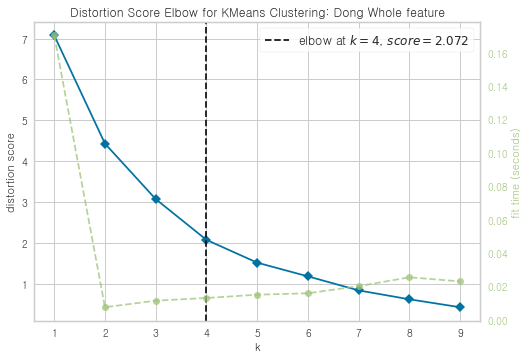

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Whole feature'}, xlabel='k', ylabel='distortion score'>

In [62]:
## 0. 모든 feature 넣고 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-1. 행정동 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
dong_wholefeature_data = dong_feature[["유동인구비율", "버스정류장 개수", "지하철역 개수", "경쟁점 개수", "주거지역 면적", "상업지역 면적", "문화체육휴양시설 면적"]].values

dong_wholefeature_data = MinMaxScaler().fit_transform(dong_wholefeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Whole feature")
visualizer.fit(dong_wholefeature_data)
visualizer.show()

In [64]:
## 0. 모든 feature 넣고 clustering 진행 결과
# 뽑힌 k로 clustering 진행 - dong- geofeature(3), 2 cluster
from sklearn.cluster import KMeans

k = 4

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_wholefeature_data)

# 결과 저장
dong_feature["dong_cluster_whole"] = model.fit_predict(dong_wholefeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_whole"]))


print(dong_feature[dong_feature["dong_cluster_whole"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_whole"] == 1]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_whole"] == 2]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_whole"] == 3]["행정동"].values)

Counter({2: 8, 0: 5, 1: 1, 3: 1})
['삼성2동' '삼성1동' '대치4동' '논현2동' '논현1동']
['역삼1동']
['청담동' '일원1동' '역삼2동' '신사동' '수서동' '대치2동' '대치1동' '개포2동']
['세곡동']


### 점포별

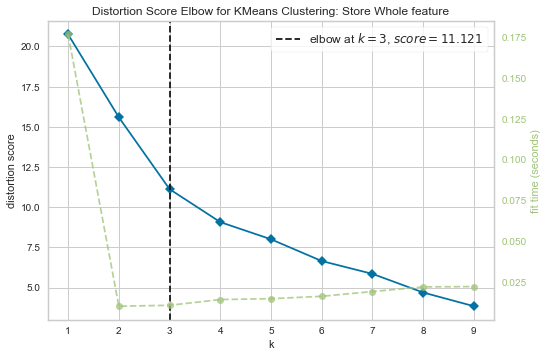

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Store Whole feature'}, xlabel='k', ylabel='distortion score'>

In [47]:
## 0. 모든 feature 넣고 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-1. 행정동 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
store_wholefeature_data = store_feature[["유동인구비율", "버스정류장 개수", "지하철역 개수", "경쟁점 개수", "주거지역 면적", "상업지역 면적", "문화체육휴양시설 면적"]].values

store_wholefeature_data = MinMaxScaler().fit_transform(store_wholefeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Store Whole feature")
visualizer.fit(store_wholefeature_data)
visualizer.show()

In [61]:
## 0. 모든 feature 넣고 clustering 진행 결과
# 뽑힌 k로 clustering 진행 - dong- geofeature(3), 2 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(store_wholefeature_data)

# 결과 저장
store_feature["store_cluster_whole"] = model.fit_predict(store_wholefeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(store_feature["store_cluster_whole"]))


print(store_feature[store_feature["store_cluster_whole"] == 0]["행정동"].values)
print(store_feature[store_feature["store_cluster_whole"] == 1]["행정동"].values)
print(store_feature[store_feature["store_cluster_whole"] == 2]["행정동"].values)
#print(store_feature[store_feature["store_cluster_whole"] == 3]["행정동"].values)

Counter({0: 14, 1: 13, 2: 6})
['(주)깐부 청담본점' '깐부치킨 신사가로수점' '깐부치킨(강남구청역1번출구점)' '깐부치킨(강남구청역3번출구점)'
 '깐부치킨(논현역점)' '깐부치킨(도산사거리점)' '깐부치킨(삼성1동점)' '깐부치킨(삼성점)' '깐부치킨(선정릉역점)'
 '깐부치킨(신사역점)' '깐부치킨(압구정현대백화점)' '깐부치킨(역삼럭키점)' '깐부치킨(역삼초교점)' '깐부치킨(학동역점)']
['(주)깐부치킨(세곡점)' '깐부치킨 대치역점' '깐부치킨(강남세브란스점)' '깐부치킨(개포점)' '깐부치킨(삼성역점)'
 '깐부치킨(선릉역1번출구점)' '깐부치킨(수서역점)' '깐부치킨(압구정한강고수부지)' '깐부치킨(은마아파트점)'
 '깐부치킨(일원점)' '깐부치킨(청담1호점)' '깐부치킨(청담자이점)' '깐부치킨(한티점)']
['깐부치킨 역삼본점' '깐부치킨(강남역플래티넘점)' '깐부치킨(대치사거리점)' '깐부치킨(선릉역점)' '깐부치킨(역삼GS타워점)'
 '깐부치킨(역삼디오빌점)']


In [ ]:
## plot 출력을 위한 결과 dataframe 제작
store_cluster_whole = pd.merge(store_feature[["매장명","행정동","인구당매출","store_cluster_whole"]], 
                           dong_feature[["행정동","dong_cluster_whole"]], on="행정동", how="right")
store_cluster_whole

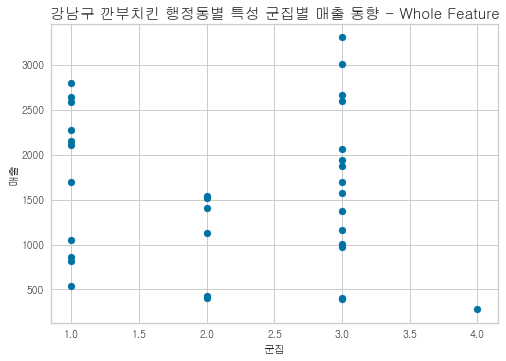

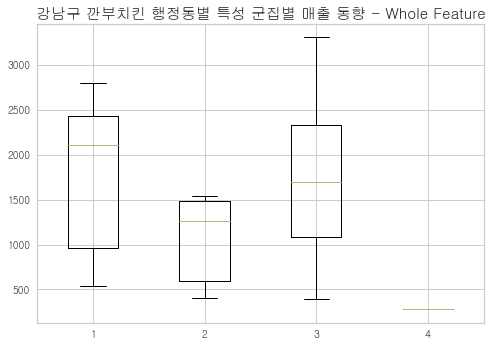

행정동별 clustering 결과
c1:  616568.0106676529 | c2:  234185.24638125006 | c3:  736054.6056481599 | c4:  0.0
528935.9542323543


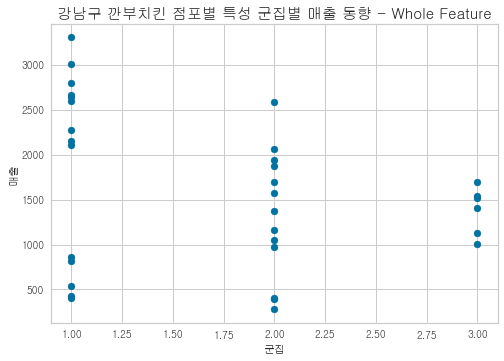

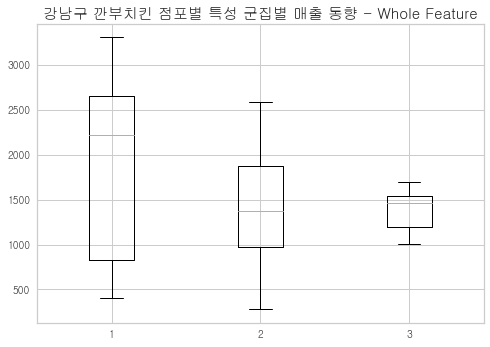

점포별 clustering 결과
c1:  1030869.8863620001 | c2:  464217.7990886983 | c3:  58241.92672247222
517776.53739105695


In [58]:
## 결과 Plot - 행정동별 feature 매출 동향
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 산점도
plt.scatter(store_cluster_whole["dong_cluster_whole"]+1, store_cluster_whole["인구당매출"])
plt.title('강남구 깐부치킨 행정동별 특성 군집별 매출 동향 - Whole Feature', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

# boxplot
c1 = store_cluster_whole[store_cluster_whole["dong_cluster_whole"] == 0]["인구당매출"].to_list()
c2 = store_cluster_whole[store_cluster_whole["dong_cluster_whole"] == 1]["인구당매출"].to_list()
c3 = store_cluster_whole[store_cluster_whole["dong_cluster_whole"] == 2]["인구당매출"].to_list()
c4 = store_cluster_whole[store_cluster_whole["dong_cluster_whole"] == 3]["인구당매출"].to_list()

value = [c1, c2, c3, c4]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 행정동별 특성 군집별 매출 동향 - Whole Feature', fontsize=15)
#plt.xticks(value, labels=["0","1","2"])
plt.show()

import numpy as np
c1_v = np.var(c1)
c2_v = np.var(c2)
c3_v = np.var(c3)
c4_v = np.var(c4)
print("행정동별 clustering 결과")
print("c1: ", c1_v, "| c2: ", c2_v, "| c3: ", c3_v, "| c4: ", c4_v)
print(np.mean([c1_v,c2_v,c3_v]))

## 결과 Plot - 점포별 feature 매출 동향
# 산점도
plt.scatter(store_cluster_whole["store_cluster_whole"]+1, store_cluster_whole["인구당매출"])
plt.title('강남구 깐부치킨 점포별 특성 군집별 매출 동향 - Whole Feature', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

# boxplot
c5 = store_cluster_whole[store_cluster_whole["store_cluster_whole"] == 0]["인구당매출"].to_list()
c6 = store_cluster_whole[store_cluster_whole["store_cluster_whole"] == 1]["인구당매출"].to_list()
c7 = store_cluster_whole[store_cluster_whole["store_cluster_whole"] == 2]["인구당매출"].to_list()

value = [c5, c6, c7]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 점포별 특성 군집별 매출 동향 - Whole Feature', fontsize=15)
#plt.xticks(value, labels=["0","1","2"])
plt.show()

import numpy as np
c5_v = np.var(c5)
c6_v = np.var(c6)
c7_v = np.var(c7)

print("점포별 clustering 결과")
print("c1: ", c5_v, "| c2: ", c6_v, "| c3: ", c7_v)
print(np.mean([c5_v,c6_v,c7_v]))

## 1. 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) clustering 진행
### 행정동별


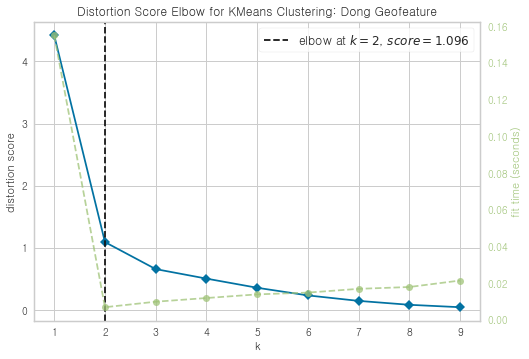

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Geofeature'}, xlabel='k', ylabel='distortion score'>

In [163]:
## 1. 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-1. 행정동 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
dong_geofeature_data = dong_feature.iloc[:,6:9].values

dong_geofeature_data = MinMaxScaler().fit_transform(dong_geofeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Geofeature")
visualizer.fit(dong_geofeature_data)
visualizer.show()

In [164]:
# 뽑힌 k로 clustering 진행 - dong- geofeature(3), 2 cluster
from sklearn.cluster import KMeans

k = 2

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_geofeature_data)

# 결과 저장
dong_feature["dong_cluster_geo"] = model.fit_predict(dong_geofeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_geo"]))


print(dong_feature[dong_feature["dong_cluster_geo"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_geo"] == 1]["행정동"].values)
#print(dong_feature[dong_feature["dong_cluster_geo"] == 2]["행정동"].values)

Counter({0: 10, 1: 5})
['청담동' '역삼2동' '역삼1동' '신사동' '삼성2동' '삼성1동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']


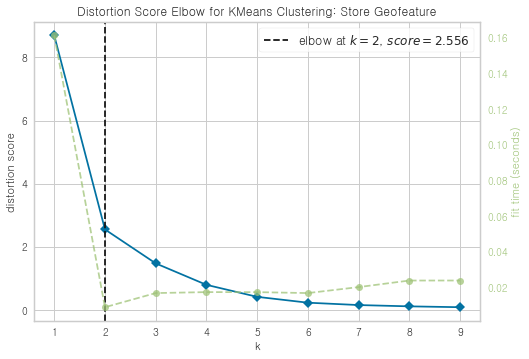

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Store Geofeature'}, xlabel='k', ylabel='distortion score'>

In [165]:
## 1. 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-2. 매장 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
store_geofeature_data = store_feature.iloc[:,6:9].values

store_geofeature_data = MinMaxScaler().fit_transform(store_geofeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Store Geofeature")
visualizer.fit(store_geofeature_data)
visualizer.show()

In [166]:
# 뽑힌 k로 clustering 진행 - store geofeature(3), 2 cluster
from sklearn.cluster import KMeans

k = 2

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(store_geofeature_data)

# 결과 저장
store_feature["store_cluster_geo"] = model.fit_predict(store_geofeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(store_feature["store_cluster_geo"]))


print(store_feature[store_feature["store_cluster_geo"] == 0]["행정동"].values)
print(store_feature[store_feature["store_cluster_geo"] == 1]["행정동"].values)
#print(store_feature[store_feature["store_cluster_geo"] == 2]["매장명"].values)
#print(store_feature[store_feature["store_cluster_geo"] == 3]["매장명"].values)

Counter({0: 26, 1: 7})
['청담동' '세곡동' '대치1동' '신사동' '삼성2동' '논현2동' '역삼2동' '역삼1동' '개포2동' '논현1동' '논현2동'
 '삼성1동' '대치2동' '삼성1동' '대치4동' '삼성2동' '수서동' '신사동' '신사동' '신사동' '역삼1동' '역삼1동'
 '대치2동' '일원1동' '수서동' '논현2동']
['역삼1동' '대치4동' '역삼1동' '역삼1동' '역삼2동' '청담동' '대치4동']


### 기존 feature

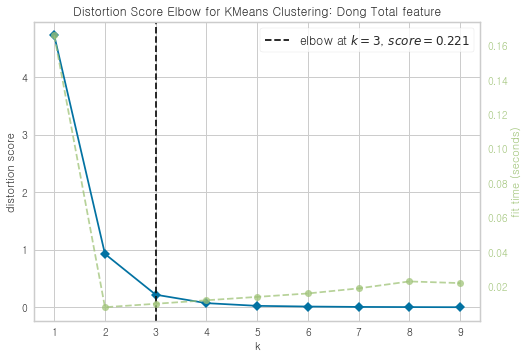

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Total feature'}, xlabel='k', ylabel='distortion score'>

In [205]:
## 2.1 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2.1-1. 행정동 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
dong_totalfeature_data = dong_feature.iloc[:,[2,9]].values

dong_totalfeature_data = MinMaxScaler().fit_transform(dong_totalfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Total feature")
visualizer.fit(dong_totalfeature_data)
visualizer.show()

In [206]:
## 2.1 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) + 인구 특성 clustering 진행
# 뽑힌 k로 clustering 진행 - dong- Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_totalfeature_data)

# 결과 저장
dong_feature["dong_cluster_total"] = model.fit_predict(dong_totalfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_total"]))


print(dong_feature[dong_feature["dong_cluster_total"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total"] == 1]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total"] == 2]["행정동"].values)

Counter({0: 8, 1: 5, 2: 2})
['청담동' '역삼2동' '신사동' '삼성2동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']
['역삼1동' '삼성1동']


### 새로운 feature 

In [190]:
dong_feature

,행정동,인구수,유동인구비율,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,dong_cluster_geo,dong_cluster_total,dong_cluster_total_new
0,청담동,30014,1.42,23,11,21,0.521318,0.045404,0.433278,0,0,0
1,일원1동,16806,1.11,16,2,19,0.243868,0.140781,0.615351,1,1,1
2,역삼2동,36560,1.36,27,7,24,0.471216,0.031786,0.496998,0,0,0
3,역삼1동,35878,3.02,49,33,83,0.611696,0.010595,0.377709,0,2,2
4,신사동,17541,2.14,12,6,18,0.568069,0.083859,0.348072,0,1,0
5,수서동,16202,1.54,17,14,10,0.341908,0.148923,0.509169,1,1,1
6,세곡동,45160,0.94,66,0,30,0.282990,0.081850,0.635160,1,2,1
7,삼성2동,30291,1.29,24,17,30,0.449894,0.024653,0.525454,0,0,0
8,삼성1동,14811,3.02,30,20,21,0.644026,0.024718,0.331256,0,0,2
9,대치4동,20773,1.62,16,6,37,0.511551,0.002936,0.485514,0,0,0


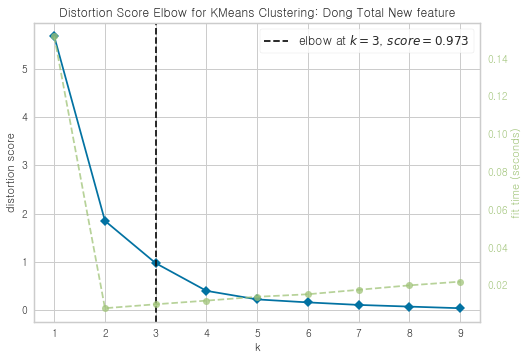

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Total New feature'}, xlabel='k', ylabel='distortion score'>

In [211]:
## 2.2 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2.2-1. 행정동 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
dong_total_newfeature_data = dong_feature.iloc[:,[2,3,9]].values

dong_total_newfeature_data = MinMaxScaler().fit_transform(dong_total_newfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Total New feature")
visualizer.fit(dong_total_newfeature_data)
visualizer.show()

In [212]:
## 2.2 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
# 뽑힌 k로 clustering 진행 - dong- Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_total_newfeature_data)

# 결과 저장
dong_feature["dong_cluster_total_new"] = model.fit_predict(dong_total_newfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_total_new"]))

print("new feature")
print(dong_feature[dong_feature["dong_cluster_total_new"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total_new"] == 1]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total_new"] == 2]["행정동"].values)

Counter({0: 8, 1: 5, 2: 2})
new feature
['청담동' '역삼2동' '신사동' '삼성2동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']
['역삼1동' '삼성1동']


### 기존 feature

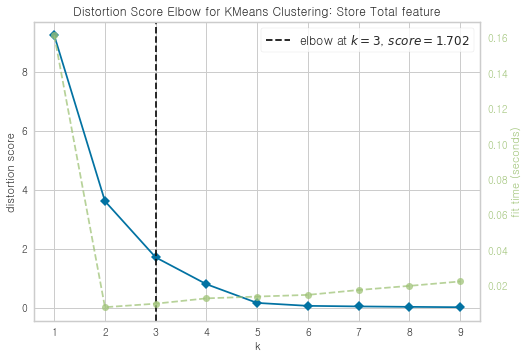

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Store Total feature'}, xlabel='k', ylabel='distortion score'>

In [174]:
## 2.1 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2.1-2. 점포 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
store_totalfeature_data = store_feature.iloc[:,[10,12]].values

store_totalfeature_data = MinMaxScaler().fit_transform(store_totalfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Store Total feature")
visualizer.fit(store_totalfeature_data)
visualizer.show()

In [175]:
## 2.1 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
# 뽑힌 k로 clustering 진행 - 매장 - Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(store_totalfeature_data)

# 결과 저장
store_feature["store_cluster_total"] = model.fit_predict(store_totalfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(store_feature["store_cluster_total"]))

print(store_feature[store_feature["store_cluster_total"] == 0]["행정동"].values)
print(store_feature[store_feature["store_cluster_total"] == 1]["행정동"].values)
print(store_feature[store_feature["store_cluster_total"] == 2]["행정동"].values)

Counter({1: 21, 2: 7, 0: 5})
['역삼1동' '삼성1동' '삼성1동' '역삼1동' '역삼1동']
['청담동' '세곡동' '대치1동' '신사동' '삼성2동' '논현2동' '역삼2동' '개포2동' '논현1동' '논현2동' '대치2동'
 '대치4동' '삼성2동' '수서동' '신사동' '신사동' '신사동' '대치2동' '일원1동' '수서동' '논현2동']
['역삼1동' '대치4동' '역삼1동' '역삼1동' '역삼2동' '청담동' '대치4동']


### 새로운 feature

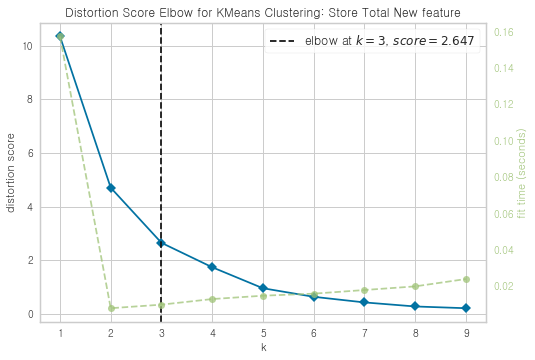

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Store Total New feature'}, xlabel='k', ylabel='distortion score'>

In [189]:
## 2.2 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2.2-2. 점포 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
store_total_newfeature_data = store_feature.iloc[:,[3,10,12]].values

store_total_newfeature_data = MinMaxScaler().fit_transform(store_total_newfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Store Total New feature")
visualizer.fit(store_total_newfeature_data)
visualizer.show()

In [185]:
## 2.2 입지특성(문화·체육·휴양시설, 상업지역, 주거지역), 버스정류장, 지하철역, 경쟁점 + 인구 특성 clustering 진행
# 뽑힌 k로 clustering 진행 - dong- Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(store_total_newfeature_data)

# 결과 저장
store_feature["store_cluster_total_new"] = model.fit_predict(store_total_newfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(store_feature["store_cluster_total_new"]))

print("새로운 feature")
print(store_feature[store_feature["store_cluster_total_new"] == 0]["행정동"].values)
print(store_feature[store_feature["store_cluster_total_new"] == 1]["행정동"].values)
print(store_feature[store_feature["store_cluster_total_new"] == 2]["행정동"].values)

Counter({1: 21, 2: 7, 0: 5})
새로운 feature
['역삼1동' '삼성1동' '삼성1동' '역삼1동' '역삼1동']
['청담동' '세곡동' '대치1동' '신사동' '삼성2동' '논현2동' '역삼2동' '개포2동' '논현1동' '논현2동' '대치2동'
 '대치4동' '삼성2동' '수서동' '신사동' '신사동' '신사동' '대치2동' '일원1동' '수서동' '논현2동']
['역삼1동' '대치4동' '역삼1동' '역삼1동' '역삼2동' '청담동' '대치4동']


In [198]:
store_feature

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,인구수,유동인구비율,인구당매출,store_cluster_geo,store_cluster_total_new,store_cluster_total
0,T06644,청담동,(주)깐부 청담본점,13,2,10,0.401674,0.020672,0.577653,30014,1.42,2662.957,0,1,1
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,0.163217,0.057290,0.779494,45160,0.94,279.949,0,1,1
2,S49287,대치1동,깐부치킨 대치역점,14,8,18,0.187485,0.082595,0.729920,25413,1.02,2063.117,0,1,1
3,T79908,신사동,깐부치킨 신사가로수점,7,0,8,0.320944,0.054508,0.624547,17541,2.14,3005.986,0,1,1
4,T53532,역삼1동,깐부치킨 역삼본점,15,8,37,0.396986,0.601307,0.001708,35878,3.02,1130.038,1,2,2
5,S23991,삼성2동,깐부치킨(강남구청역1번출구점),10,10,17,0.276475,0.021761,0.701764,30291,1.29,862.467,0,1,1
6,T46063,논현2동,깐부치킨(강남구청역3번출구점),14,10,18,0.336520,0.030976,0.632504,21960,2.00,2113.229,0,1,1
7,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,0.285410,0.029224,0.685366,36560,1.36,402.694,0,1,1
8,S37219,역삼1동,깐부치킨(강남역플래티넘점),32,20,29,0.934253,0.027802,0.037945,35878,3.02,1544.066,0,0,0
9,S41446,개포2동,깐부치킨(개포점),21,15,11,0.087827,0.161833,0.750340,14380,1.07,1377.086,0,1,1


In [207]:
dong_feature

,행정동,인구수,유동인구비율,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,dong_cluster_geo,dong_cluster_total,dong_cluster_total_new
0,청담동,30014,1.42,23,11,21,0.521318,0.045404,0.433278,0,0,0
1,일원1동,16806,1.11,16,2,19,0.243868,0.140781,0.615351,1,1,1
2,역삼2동,36560,1.36,27,7,24,0.471216,0.031786,0.496998,0,0,0
3,역삼1동,35878,3.02,49,33,83,0.611696,0.010595,0.377709,0,2,2
4,신사동,17541,2.14,12,6,18,0.568069,0.083859,0.348072,0,0,0
5,수서동,16202,1.54,17,14,10,0.341908,0.148923,0.509169,1,1,1
6,세곡동,45160,0.94,66,0,30,0.282990,0.081850,0.635160,1,1,1
7,삼성2동,30291,1.29,24,17,30,0.449894,0.024653,0.525454,0,0,0
8,삼성1동,14811,3.02,30,20,21,0.644026,0.024718,0.331256,0,2,2
9,대치4동,20773,1.62,16,6,37,0.511551,0.002936,0.485514,0,0,0


In [17]:
store_feature

,매장명,행정동,인구당매출,유동인구비율,점포_문화·체육·휴양시설,점포_상업지역,점포_주거지역,store_cluster_geo,store_cluster_total
0,깐부치킨(청담자이점),청담동,1575.615,1.42,0.669139,0.307067,0.023793,1,2
1,(주)깐부 청담본점,청담동,2662.957,1.42,0.020672,0.401674,0.577653,0,1
2,깐부치킨(일원점),일원1동,1868.511,1.11,0.090701,0.202634,0.706666,0,1
3,깐부치킨(역삼디오빌점),역삼2동,1002.229,1.36,0.611439,0.387749,0.000812,1,2
4,깐부치킨(강남세브란스점),역삼2동,402.694,1.36,0.029224,0.285410,0.685366,0,1
5,깐부치킨(역삼초교점),역삼1동,399.284,3.02,0.008250,0.393659,0.598091,0,0
6,깐부치킨(역삼GS타워점),역삼1동,1402.823,3.02,0.612286,0.386447,0.001267,1,2
7,깐부치킨 역삼본점,역삼1동,1130.038,3.02,0.601307,0.396986,0.001708,1,2
8,깐부치킨(역삼럭키점),역삼1동,422.320,3.02,0.011219,0.306944,0.681837,0,0
9,깐부치킨(강남역플래티넘점),역삼1동,1544.066,3.02,0.027802,0.934253,0.037945,0,0


In [208]:
## plot 출력을 위한 결과 dataframe 제작
store_cluster = pd.merge(store_feature[["매장명","행정동","인구당매출","store_cluster_total", "store_cluster_total_new"]], 
                           dong_feature[["행정동","dong_cluster_total","dong_cluster_total_new"]], on="행정동", how="right")
store_cluster

,매장명,행정동,인구당매출,store_cluster_total,store_cluster_total_new,dong_cluster_total,dong_cluster_total_new
0,(주)깐부 청담본점,청담동,2662.957,1,1,0,0
1,깐부치킨(청담자이점),청담동,1575.615,2,2,0,0
2,깐부치킨(일원점),일원1동,1868.511,1,1,1,1
3,깐부치킨(강남세브란스점),역삼2동,402.694,1,1,0,0
4,깐부치킨(역삼디오빌점),역삼2동,1002.229,2,2,0,0
5,깐부치킨 역삼본점,역삼1동,1130.038,2,2,2,2
6,깐부치킨(강남역플래티넘점),역삼1동,1544.066,0,0,2,2
7,깐부치킨(선릉역점),역삼1동,1513.462,2,2,2,2
8,깐부치킨(역삼GS타워점),역삼1동,1402.823,2,2,2,2
9,깐부치킨(역삼럭키점),역삼1동,422.320,0,0,2,2


In [24]:
## 결과 Plot
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

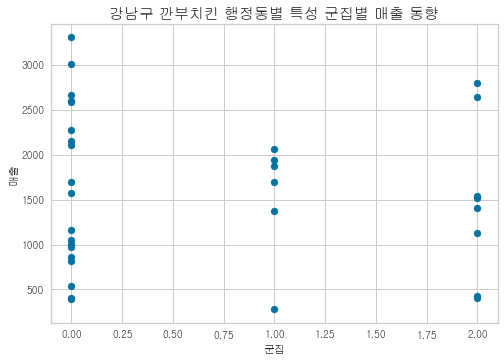

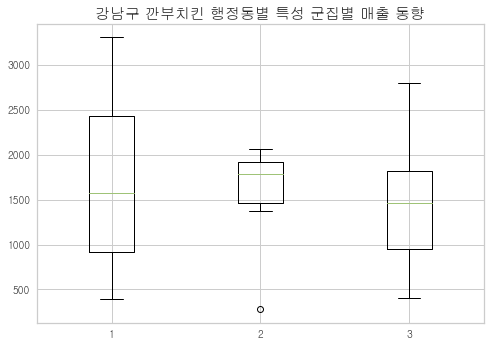

c1:  811189.6941456065 | c2:  362846.55212047225 | c3:  689808.8316392344
621281.6926351044


'\n# boxplot\nc1 = store_cluster[store_cluster["dong_cluster_total_new"] == 0]["인구당매출"].to_list()\nc2 = store_cluster[store_cluster["dong_cluster_total_new"] == 1]["인구당매출"].to_list()\nc3 = store_cluster[store_cluster["dong_cluster_total_new"] == 2]["인구당매출"].to_list()\n\nvalue = [c1, c2, c3]\nplt.boxplot(value) # vert: 가로/세로 상자그림\nplt.title(\'강남구 깐부치킨 행정동별 신특성 군집별 매출 동향\', fontsize=15)\n#plt.xticks(value, labels=["0","1","2"])\nplt.show()\n'

In [217]:
## 행정동별 feature 매출 동향
# 산점도
plt.scatter(store_cluster["dong_cluster_total"], store_cluster["인구당매출"])
plt.title('강남구 깐부치킨 행정동별 특성 군집별 매출 동향', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

"""
# 산점도
plt.scatter(store_cluster["dong_cluster_total_new"], store_cluster["인구당매출"], color="red")
plt.title('강남구 깐부치킨 행정동별 신특성 군집별 매출 동향', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()
"""


# boxplot
c1 = store_cluster[store_cluster["dong_cluster_total"] == 0]["인구당매출"].to_list()
c2 = store_cluster[store_cluster["dong_cluster_total"] == 1]["인구당매출"].to_list()
c3 = store_cluster[store_cluster["dong_cluster_total"] == 2]["인구당매출"].to_list()

value = [c1, c2, c3]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 행정동별 특성 군집별 매출 동향', fontsize=15)
#plt.xticks(value, labels=["0","1","2"])
plt.show()

import numpy as np
c1_v = np.var(c1)
c2_v = np.var(c2)
c3_v = np.var(c3)
print("c1: ", c1_v, "| c2: ", c2_v, "| c3: ", c3_v)
print(np.mean([c1_v,c2_v,c3_v]))
"""
# boxplot
c1 = store_cluster[store_cluster["dong_cluster_total_new"] == 0]["인구당매출"].to_list()
c2 = store_cluster[store_cluster["dong_cluster_total_new"] == 1]["인구당매출"].to_list()
c3 = store_cluster[store_cluster["dong_cluster_total_new"] == 2]["인구당매출"].to_list()

value = [c1, c2, c3]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 행정동별 신특성 군집별 매출 동향', fontsize=15)
#plt.xticks(value, labels=["0","1","2"])
plt.show()
"""

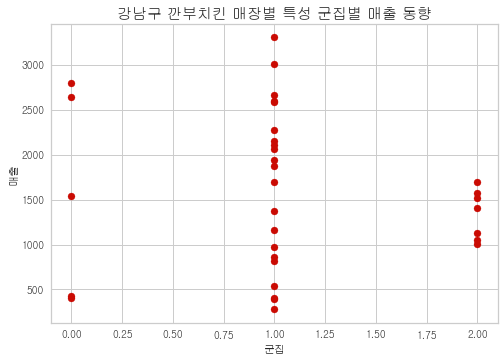

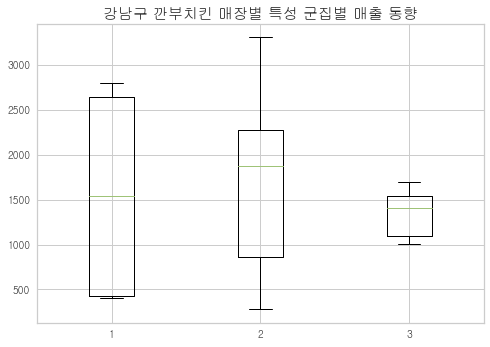

c1:  1071063.58590496 | c2:  803627.7613932833 | c3:  65189.769424204074
646627.0389074824


In [219]:
# 매장별 feature 매출 동향
plt.scatter(store_cluster["store_cluster_total"], store_cluster["인구당매출"], color="r")
plt.title('강남구 깐부치킨 매장별 특성 군집별 매출 동향', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

# boxplot
c1 = store_cluster[store_cluster["store_cluster_total"] == 0]["인구당매출"].to_list()
c2 = store_cluster[store_cluster["store_cluster_total"] == 1]["인구당매출"].to_list()
c3 = store_cluster[store_cluster["store_cluster_total"] == 2]["인구당매출"].to_list()

value = [c1, c2, c3]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 매장별 특성 군집별 매출 동향', fontsize=15)
#plt.xticks(value, labels=["0","1","2"])
plt.show()


c1_v = np.var(c1)
c2_v = np.var(c2)
c3_v = np.var(c3)
print("c1: ", c1_v, "| c2: ", c2_v, "| c3: ", c3_v)
print(np.mean([c1_v,c2_v,c3_v]))